# Risky Business

Harold has been boasting about his recent cryptocurrency returns. He's even bet you five bucks that his trading algorithm has made his returns better than yours. Calculate the standard deviation and sharpe ratio for each your portfolios to determine which portfolio is the better investment based off of the greatest risk to reward ratio.

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

### Read in data

In [2]:
harold_portfolio_path = Path("../../Resources/harold_portfolio.csv")
my_portfolio_path = Path("../../Resources/my_portfolio.csv")

# Read in data
harold_portfolio = pd.read_csv(harold_portfolio_path, parse_dates=True, infer_datetime_format=True)
my_portfolio = pd.read_csv(my_portfolio_path, parse_dates=True, infer_datetime_format=True)

# Drop na
# harold_portfolio = harold_portfolio.dropna()
# my_portfolio = my_portfolio.dropna()

# Set Date as index
harold_portfolio = harold_portfolio.set_index('Date')
my_portfolio = my_portfolio.set_index('Date')

harold_portfolio.sort_index(ascending=True, inplace=True)
my_portfolio.sort_index(ascending=True, inplace=True)

harold_1yr = harold_portfolio.loc['2018-05-20':'2019-05-20']
harold_returns = harold_1yr.pct_change()
harold_std = harold_returns.std()

my_1yr = my_portfolio.loc['2018-05-20':'2019-05-20']
my_returns = my_1yr.pct_change()
my_std = my_returns.std()



### Calculate daily returns 

### `Concat` portfolios into one DataFrame

In [3]:
all_returns = pd.concat([harold_returns, my_returns], axis='columns', join='inner')
all_returns

,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL,BTC,DOGE,ETH,LTC,XRP,XLM
Date,,,,,,,,,,,,,,,,
2018-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-21,-0.014491,NaN,0.039439,0.025921,0.032444,0.032224,NaN,NaN,0.042193,NaN,0.034152,0.039439,0.025921,0.032444,0.032224,0.028932
2018-05-22,-0.048340,NaN,0.037099,-0.024132,-0.036734,0.043133,NaN,NaN,0.012977,NaN,-0.014491,0.037099,-0.024132,-0.036734,0.043133,0.015076
2018-05-23,-0.060430,NaN,-0.042818,-0.080758,-0.045807,-0.014571,NaN,NaN,-0.045161,NaN,-0.048340,-0.042818,-0.080758,-0.045807,-0.014571,-0.035502
2018-05-24,0.010546,NaN,0.034541,-0.098829,-0.072282,0.023570,NaN,NaN,0.023623,NaN,-0.060430,0.034541,-0.098829,-0.072282,0.023570,0.007376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-16,-0.039540,0.038732,-0.042322,0.145143,0.115280,-0.079600,-0.007365,0.002051,-0.079463,-0.081072,0.026580,-0.042322,0.145143,0.115280,-0.079600,0.002051
2019-05-17,-0.065398,0.081356,-0.065025,0.061807,-0.063661,-0.079851,0.162057,-0.078094,-0.056728,-0.044486,-0.039540,-0.065025,0.061807,-0.063661,-0.079851,-0.078094
2019-05-18,-0.013755,0.037618,0.014517,-0.074889,-0.061305,-0.034845,0.108375,0.017944,-0.014585,-0.011569,-0.065398,0.014517,-0.074889,-0.061305,-0.034845,0.017944


### Calculate `std dev` for all data

In [4]:
all_portfolio_std = all_returns.std()
all_portfolio_std

BTC      0.035602
BTT      0.054604
DOGE     0.056955
ETH      0.052809
LTC      0.053550
XRP      0.052954
SOLVE    0.067866
XLM      0.045011
TRON     0.053485
ZIL      0.043158
BTC      0.035643
DOGE     0.056955
ETH      0.052809
LTC      0.053550
XRP      0.052954
XLM      0.049547
dtype: float64

### Calculate `sharpe ratio` for all data

In [5]:
sharpe_ratio = (all_returns.mean()*252) / (all_portfolio_std * np.sqrt(252))
sharpe_ratio

BTC       0.220066
BTT       9.586636
DOGE      0.320915
ETH      -0.413088
LTC       0.118971
XRP       0.016287
SOLVE    20.342644
XLM       2.372035
TRON     -0.187177
ZIL       0.528730
BTC       0.275461
DOGE      0.320915
ETH      -0.413088
LTC       0.118971
XRP       0.016287
XLM      -0.300508
dtype: float64

### Plot Sharpe Ratios

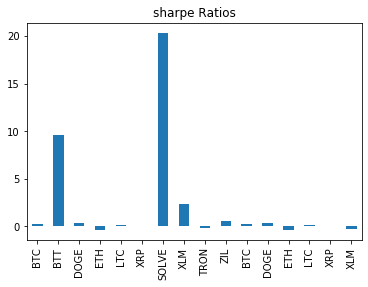

In [6]:
sharpe_ratio.plot.bar(title='sharpe Ratios')

### How many smart investments did Harold make compared to risky investments? How many did you make?

### Which cryptos have been the smartest investment?